In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [5]:
file = pd.ExcelFile('/home/sns/Téléchargements/!Mon cours de Réseaux connexionnistes Master 1 - TP - a - Données Perceptron Simple.xlsx')
print(file)

In [6]:
baseApprentissage = file.sheet_names[1]
df_baseApprentissage = pd.read_excel(file, sheet_name = baseApprentissage)
trainingTest = df_baseApprentissage.iloc[:,0:3].values

In [7]:
output = df_baseApprentissage[['C']].values

In [8]:
initPerceptron = [0,0,0]

In [9]:
def algorithmePerceptron(base,sortie,w):
  for i in range(base.shape[0]):
    somme = 0
    for j in range(base.shape[1]):
      somme += base[i][j] * w[j]
    y = 1 if somme > 0 else 0
    for j in range(base.shape[1]):
      w[j] += (sortie[i][0] - y) * base[i][j]
    print(f"{sortie[i][0]} : {y}")
  return w

In [10]:
perceptron = algorithmePerceptron(trainingTest, output, initPerceptron)

0 : 0
1 : 0
0 : 1
1 : 1
0 : 1
1 : 0
0 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1


In [11]:
print(perceptron)

[np.float64(-1.0), np.float64(-2.4000000000000004), np.float64(4.3)]


In [12]:
baseTest = file.sheet_names[2]
df_baseTest = pd.read_excel(file, sheet_name = baseTest)
testSet = df_baseTest.iloc[:, 1:3]
output_btest = df_baseTest[['Type De RdN']].values
biais = np.ones(output_btest.shape[0])
testSet.insert(0,'Biais', biais)
testSet = testSet.values

In [13]:
perceptron = algorithmePerceptron(testSet, output_btest, perceptron)

0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1


In [14]:
print(perceptron)
joblib.dump(perceptron,'perceptron.pkl')

[np.float64(-1.0), np.float64(-2.4000000000000004), np.float64(4.3)]


['perceptron.pkl']

In [15]:
def prediction(lengthSepal, lengthPetal):
  weightedSum = perceptron[0] + lengthSepal * perceptron[1] + lengthPetal * perceptron[2]
  return "Iris-Versicolor" if weightedSum > 0 else "Iris-Setosa"
typeDeFleurs = prediction(5.6, 3.6)
print(typeDeFleurs)

Iris-Versicolor


In [16]:
typeDeFleurs = prediction(5.8, 1.2)
print(typeDeFleurs)

Iris-Setosa


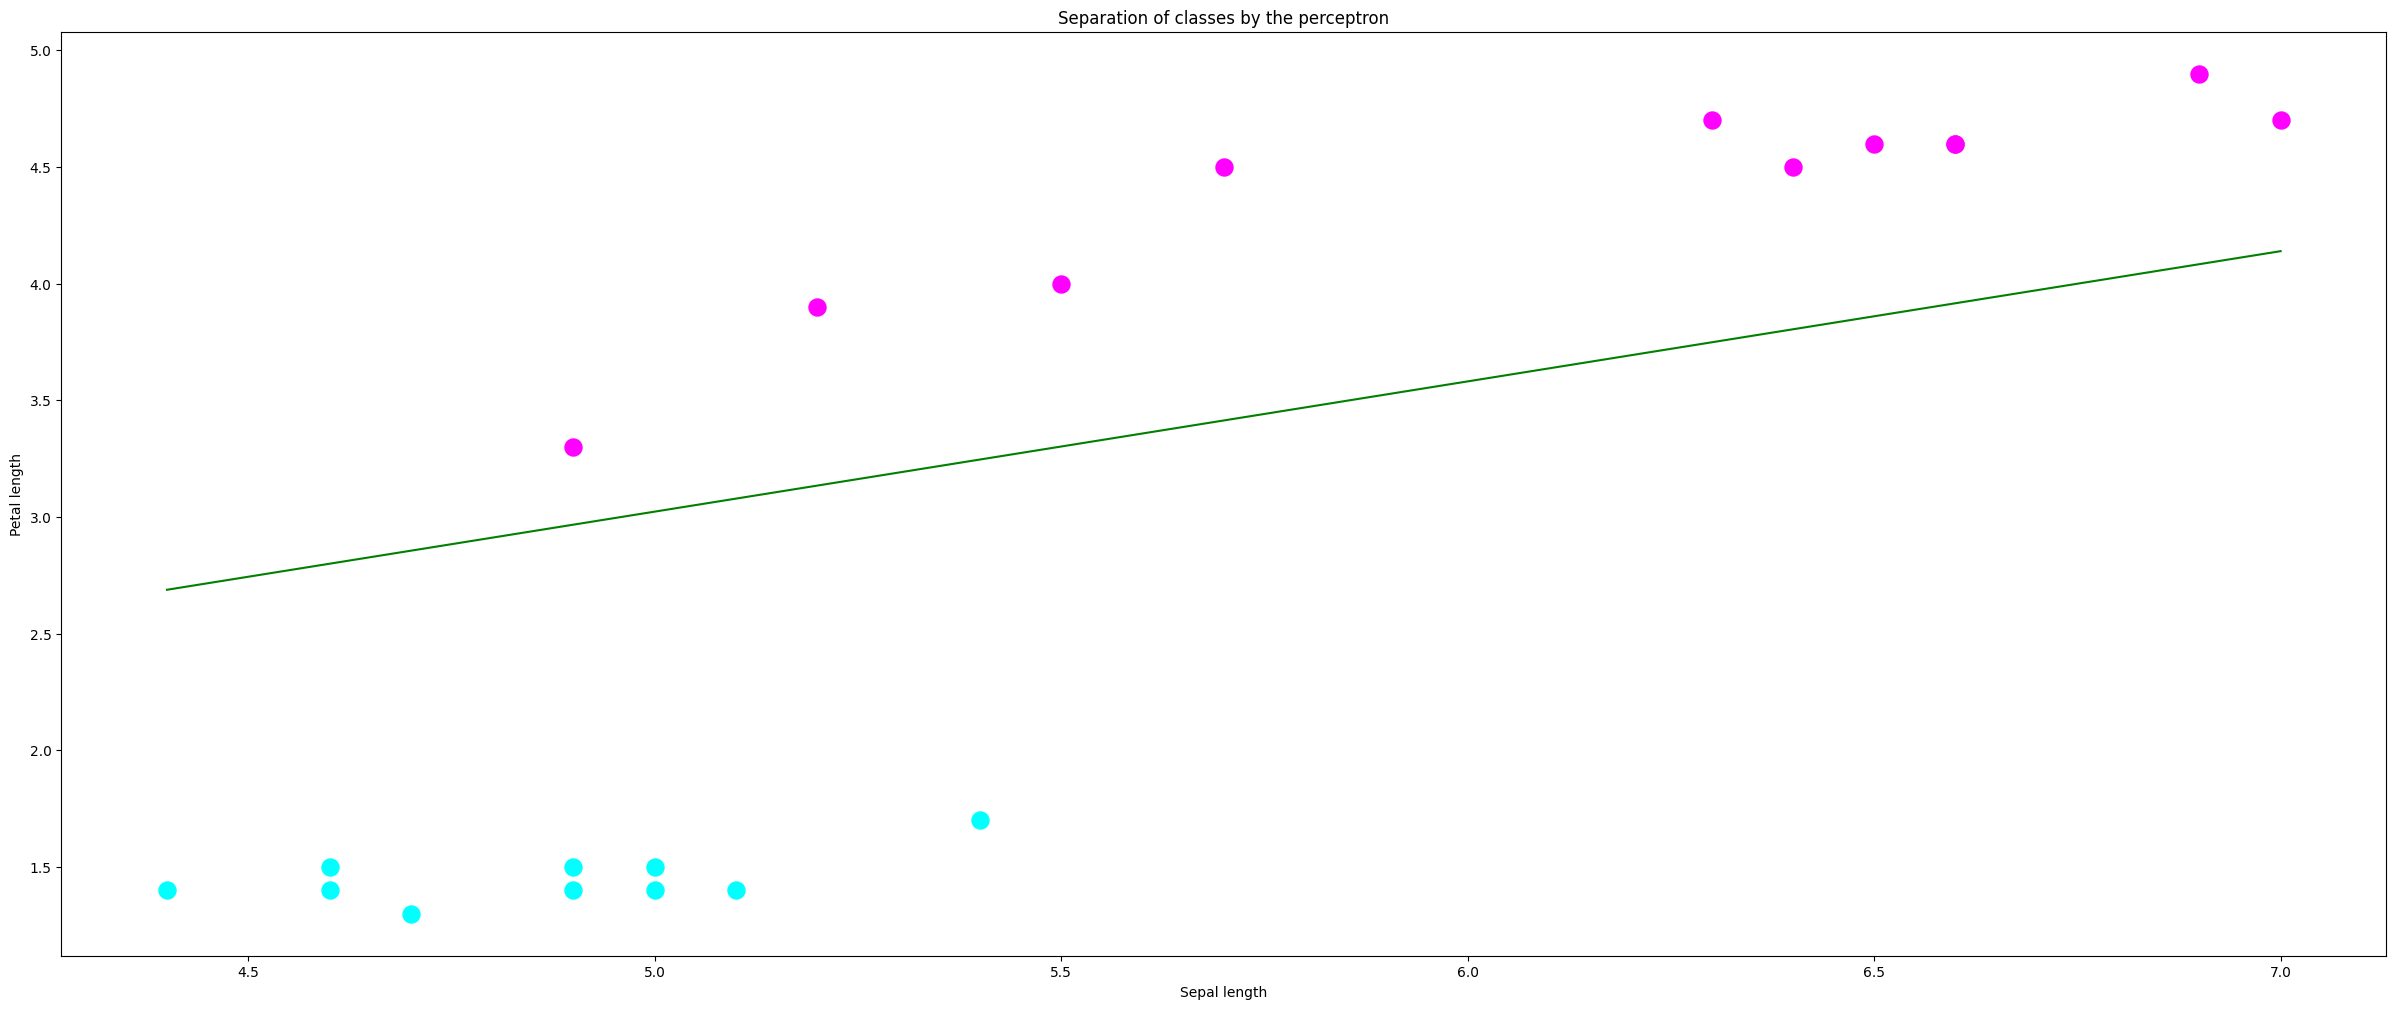

In [18]:
plt.figure(figsize=(30,12))
for i in range(len(output)):
  if output[i] == 0:
    plt.scatter(trainingTest[i][1], trainingTest[i][2], color='cyan', s = 150, label = 'Setosa')
  else:
    plt.scatter(trainingTest[i][1], trainingTest[i][2], color='magenta', s = 150, label = 'Versicolor')
x_values = np.linspace(min(trainingTest[:, 1]), max(trainingTest[:,1]), 100)
y_values = -(perceptron[0] + perceptron[1] * x_values) / perceptron[2]
plt.plot(x_values, y_values, color='green', label = 'Perceptron')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Separation of classes by the perceptron')
plt.show()